In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_fscore_support, f1_score, roc_curve, roc_auc_score, RocCurveDisplay, auc
from collections import Counter
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [2]:


def convert(data):
    number = preprocessing.LabelEncoder()
    data['operator'] = number.fit_transform(data.operator)
    data['methodReturn'] = number.fit_transform(data.methodReturn)
    data['isKilled'] = number.fit_transform(data.isKilled)
    return data

# Read in data and display first 5 rows
features = pd.read_csv('/home/akash/Downloads/Machine/Machine Learning Final Project/Data/training_data.csv',encoding= 'unicode_escape')
#print(features)
#print('The shape of our features is:', features.shape)

#Convert string to float
features=convert(features)
#print(features)
#print('The shape of our features is:', features.shape) 

# Use numpy to convert to arrays
# Labels are the values we want to predict
labels = np.array(features['isKilled'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('isKilled', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [3]:
#Without validation set. Replicating paper

# Instantiate model with 100 decision trees default
dt = tree.DecisionTreeClassifier()
dt.fit(features, labels)
y_pred_train = dt.predict(features)
print(accuracy_score(labels, y_pred_train))
print(confusion_matrix(labels, y_pred_train))

0.9808943027611763
[[465317   4873]
 [  6434 115189]]


[0.00752902 0.00456403 0.01153571 0.02200713 0.00921671 0.01300253
 0.01328669 0.02004866 0.81979916 0.02473812 0.0098155  0.01616297
 0.01619283 0.01210095]


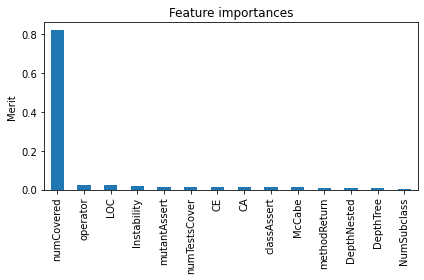

In [4]:
##Plot feature importance
feature_names = [f"features {i}" for i in range(features.shape[1])]
feature_names = ['DepthTree', 'NumSubclass', 'McCabe', 'LOC','DepthNested','CA','CE','Instability','numCovered','operator','methodReturn','numTestsCover','mutantAssert','classAssert']
importances = dt.feature_importances_
print(importances)
tree_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

#Feature importance
fig, ax = plt.subplots()
tree_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Merit")
fig.tight_layout()

0.820151927376559
Confusion_matrix:
 [[84435  8547]
 [18159 37351]]
(0.820151927376559, 0.820151927376559, 0.8201519273765591, None)
0.8201519273765591
[0.         0.62397766 0.62422987 0.62437399 0.62437399 0.62511259
 0.62529274 0.62531075 0.62556296 0.62640966 0.62640966 0.62642767
 0.62696811 0.62725635 0.62727436 0.63309314 0.63327328 0.63330931
 0.63874977 0.63968654 0.64840569 0.64851378 0.65080166 0.65083769
 0.65083769 0.66508737 0.66544767 0.66593407 0.66762745 0.66795172
 0.66798775 0.66822194 0.66888849 0.66982526 0.67272564 0.67286975
 0.67286975 0.707314   0.70871915 0.70873716 0.70875518 0.71423167
 0.71484417 0.71664565 0.71790668 0.72021257 0.72399568 0.72556296
 0.72565304 0.73406593 0.73444424 0.73936228 0.74411818 0.74437038
 0.74521708 0.74581157 0.74595568 0.74635201 0.74642407 0.7464601
 0.7464601  0.7465862  1.        ] [0.         0.080037   0.080037   0.08010153 0.08012303 0.08018756
 0.08019832 0.08019832 0.08021983 0.08023058 0.08040266 0.08042417
 0.0804887

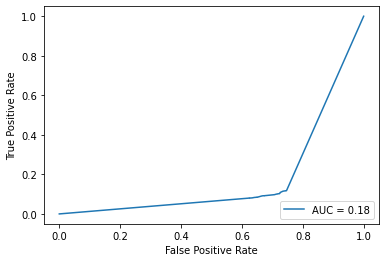

In [5]:
##Input test data
positive_prob = []
test = pd.read_csv('/home/akash/Downloads/Machine/Machine Learning Final Project/Data/testing_data.csv',encoding= 'unicode_escape')

#Convert string to float
test=convert(test)

# ## Labels are the values we want to predict
test_labels = np.array(test['isKilled'])

# # Remove the labels from the features
# # axis 1 refers to the columns
test= test.drop('isKilled', axis = 1)
# # Saving feature names for later use
feature_list = list(test.columns)
# # Convert to numpy array
test = np.array(test)
y_pred_test = dt.predict(test)
#print("Predicted labels::", y_pred_test)
print(accuracy_score(test_labels, y_pred_test))
confusion = confusion_matrix(test_labels, y_pred_test)
print("Confusion_matrix:\n",confusion)
print(precision_recall_fscore_support(test_labels, y_pred_test, average='micro'))
print(f1_score(test_labels, y_pred_test, average='micro'))

# # #Get the probability of each predictions
predicted = dt.predict_proba(test)
#print(predicted)
# # #Take the positive predictictability i.e. survived for calculating ROC AUC
for i in predicted:
    positive_prob.append(i[1])
#print(positive_prob)
#Calculate ROC
fpr, tpr, thresholds = roc_curve(test_labels, positive_prob, pos_label=0)
print(fpr, tpr, thresholds)
try:
    print("AUC: ", roc_auc_score(test_labels, positive_prob))
    roc_auc = auc(fpr, tpr)
    print(roc_auc)
except:
    pass
display = RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc)
display.plot()

In [6]:
##Validation set create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.5)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
dt = tree.DecisionTreeClassifier()
print(type(dt))
dt.fit(features, labels)
y_pred_train = dt.predict(X_test)
print(accuracy_score(y_test, y_pred_train))
print(confusion_matrix(y_test, y_pred_train))

(295906, 14) (295906,)
(295907, 14) (295907,)
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
0.9810413406915011
[[232506   2432]
 [  3178  57791]]


In [7]:
from sklearn.model_selection import PredefinedSplit, GridSearchCV
split_index = [-1] * len(X_train) + [0]*len(X_test)
X = np.concatenate((X_train, X_test), axis =0)
y = np.concatenate((y_train, y_test), axis = 0)
pds = PredefinedSplit(test_fold = split_index)
pds.get_n_splits()

1

In [8]:
dt =tree.DecisionTreeClassifier()
print(dt.get_params().keys())
rf = RandomForestClassifier()
print(rf.get_params().keys())

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])
dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])


In [9]:
#Hyper parameter tuning
#Criterion to getinformation gain
criterion = ['entropy','gini']
#splitter
splitter = ["best", "random"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Create the random grid
random_grid = {
                'criterion':criterion,
                'splitter' :splitter,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'max_features': max_features
                }

# Import the model we are using
dt = tree.DecisionTreeClassifier()
# Use the random grid to search for best hyperparameters
# First create the base model to tune

dt_random = RandomizedSearchCV(estimator = dt, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=5, n_jobs = -1)



dt_random.fit(features, labels)
print(dt_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini'}


In [10]:
best_entropy_with_cv = dt_random.best_estimator_
print(best_entropy_with_cv)
y_pred_test = dt_random.predict(test)
best_accuracy_entropy_with_cv = accuracy_score(test_labels, y_pred_test)
best_confusion_entropy_with_cv = confusion_matrix(test_labels, y_pred_test)
print(best_accuracy_entropy_with_cv)
print(best_confusion_entropy_with_cv )

DecisionTreeClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=4)
0.8298965600840449
[[79925 13057]
 [12202 43308]]


In [11]:

dt = tree.DecisionTreeClassifier(criterion ='entropy',splitter= 'best',max_depth=10,min_samples_split=2,min_samples_leaf=4,max_features='auto',)
dt.fit(features, labels)
y_pred_test = dt.predict(test)
#print("Predicted labels::", y_pred_test)
best_accuracy_entropy_with_kfold = accuracy_score(test_labels, y_pred_test)
best_confusion_entropy_with_kfold = confusion_matrix(test_labels, y_pred_test)
print(best_accuracy_entropy_with_kfold)
print(best_confusion_entropy_with_kfold)

0.8541066185383724
[[79692 13290]
 [ 8374 47136]]
